<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Student-Info" data-toc-modified-id="Student-Info-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Student Info</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Hypothesis-II" data-toc-modified-id="Hypothesis-II-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hypothesis II</a></span></li><li><span><a href="#STEP-1:-Load-the-Data-and-determine-Test-Type" data-toc-modified-id="STEP-1:-Load-the-Data-and-determine-Test-Type-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>STEP 1: Load the Data and determine Test Type</a></span><ul class="toc-item"><li><span><a href="#Initialise-Libraries" data-toc-modified-id="Initialise-Libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Initialise Libraries</a></span></li><li><span><a href="#Retrieve-data-from-database" data-toc-modified-id="Retrieve-data-from-database-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Retrieve data from database</a></span><ul class="toc-item"><li><span><a href="#Sample-Group-Design" data-toc-modified-id="Sample-Group-Design-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Sample Group Design</a></span></li></ul></li></ul></li><li><span><a href="#STEP-2:-Validate-Assumptions-chosen-test" data-toc-modified-id="STEP-2:-Validate-Assumptions-chosen-test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>STEP 2: Validate Assumptions chosen test</a></span><ul class="toc-item"><li><span><a href="#Check-and-Remove-Outliers" data-toc-modified-id="Check-and-Remove-Outliers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Check and Remove Outliers</a></span></li><li><span><a href="#Test-for-Normality" data-toc-modified-id="Test-for-Normality-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Test for Normality</a></span><ul class="toc-item"><li><span><a href="#Check-group-size" data-toc-modified-id="Check-group-size-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Check group size</a></span></li></ul></li><li><span><a href="#Test-for-Equal-Variance" data-toc-modified-id="Test-for-Equal-Variance-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Test for Equal Variance</a></span></li></ul></li><li><span><a href="#STEP-4:-Interpret-Result-&amp;-Post-Hoc-Tests" data-toc-modified-id="STEP-4:-Interpret-Result-&amp;-Post-Hoc-Tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>STEP 4: Interpret Result &amp; Post-Hoc Tests</a></span><ul class="toc-item"><li><span><a href="#2-Sample-T-Test" data-toc-modified-id="2-Sample-T-Test-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>2 Sample T-Test</a></span></li><li><span><a href="#Effect-Size" data-toc-modified-id="Effect-Size-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Effect Size</a></span><ul class="toc-item"><li><span><a href="#Cohen's-d" data-toc-modified-id="Cohen's-d-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Cohen's d</a></span></li></ul></li><li><span><a href="#Anova-Test" data-toc-modified-id="Anova-Test-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Anova Test</a></span></li><li><span><a href="#Tukey's-Pairwise-Comparison" data-toc-modified-id="Tukey's-Pairwise-Comparison-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Tukey's Pairwise Comparison</a></span></li></ul></li><li><span><a href="#Final-Analysis" data-toc-modified-id="Final-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Analysis</a></span></li></ul></div>

## Student Info
Name: Susanna Mir
Cohort: DS-PT
Instructor: James Irving

********************************

## Introduction

********************************

## Hypothesis II

>Does the product supplier country have a significant effect on the number of orders shipped for delivery
to customers in the same country? If not, which countries?

- $H_1$: The supplier country DOES have a significant effect on the number of orders shipped for delivery
to customers in the same country.
- $H_0$: The supplier country DOES NOT have a significant effect on the number of orders shipped for delivery to customers in the same country.


Set the P-Value
$\alpha$=0.05
If the P-Value is < 0.5 we can be confident that we can reject the null hypothesis

- $H_1$: What does it mean to be significant?  (P-Value< 0.5)
An observed difference between the two groups is probably not due to chance

- $H_0$: What does it mean to NOT be significant?  (P-Value> 0.5)
There is not enough evidence to say that an observed difference between the two groups is not random.  (If there is a difference, it is smaller than we care about)


********************************

## STEP 1: Load the Data and determine Test Type

### Initialise Libraries

In [20]:
import pandas as pd
import numpy as np
import sqlite3
import scipy.stats as stat
from scipy import stats

#data visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#for t-tests
from scipy.stats import ttest_ind

#for ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from scipy.stats import f_oneway

#for Project Library Functions
from functions import Cohen_d, find_outliers_IQR,find_outliers_Z
## Uncomment the line below to see the source code for the imported functions
# fs.ihelp(Cohen_d,False),fs.ihelp(find_outliers_IQR,False), fs.ihelp(find_outliers_Z,False)

### Retrieve data from database

The schema below defines the tables and relationships for the database. The Order_Details table contains information with the columns of interest: [Quantity] [UnitPrice] and [Order_ID].  The Order table has the columns of interest OrderDate.

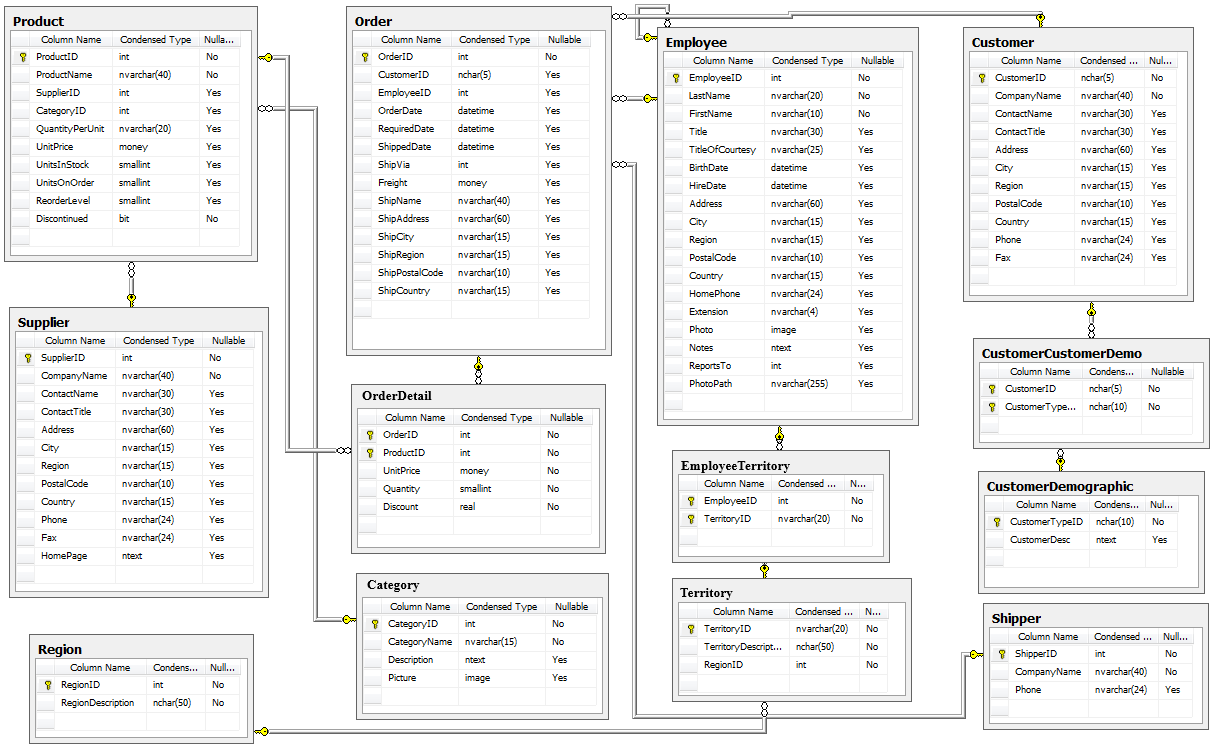

In [21]:
from IPython.display import Image
Image("Northwind_ERD.png")

In [66]:
# create a connection to the database
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()

In [67]:
# view table definition
cur.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


In [204]:
# query the database
cur.execute('''
     SELECT od.OrderID, od.UnitPrice, od.Quantity, o.OrderDate 
     FROM OrderDetail od, `Order` o
     WHERE o.Id = od.OrderID;
     ''')

# store results in a dataframe
df_order_details = pd.DataFrame(cur.fetchall())
df_order_details.columns = [i[0] for i in cur.description]

# check the import
df_order_details.head()

,OrderId,UnitPrice,Quantity,OrderDate
0,10248,14.0,12,2012-07-04
1,10248,9.8,10,2012-07-04
2,10248,34.8,5,2012-07-04
3,10249,18.6,9,2012-07-05
4,10249,42.4,40,2012-07-05


In [205]:
df_order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 4 columns):
OrderId      2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
OrderDate    2155 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 67.4+ KB


In [93]:
## Data Clean check - are there any null values?

In [24]:
# # query the database
# cur.execute("SELECT * FROM OrderDetail;")

# # store results in a dataframe
# df_order_details_total_spent = pd.DataFrame(cur.fetchall())

In [206]:
df_order_details.isna().sum()

OrderId      0
UnitPrice    0
Quantity     0
OrderDate    0
dtype: int64

In [ ]:
# no null values found

#### Sample Group Design

What type of data do I have (Numeric or categorical?)
- Numerical (Total Spent) + Categorical (Order Month) - 2 Sample T-Test

How many samples/groups am I comparing? = 	
- 2 therefore focus on using a 2 Sample T-Test

In [195]:
def GetMonth(dtDate):
    """Desc

    Args:
      
    Returns:
         
    """
    from datetime import datetime
    
    print(type(dtDate))
    dtToDateStr = datetime.strftime(dtDate, '%Y-%m-%d')
    #print(strDate)
    dtToDate = datetime.strptime(dtToDateStr, '%Y-%m-%d').date()
    print(dtToDate.month)
    #return datetime.month(dtToDate)
    return (dtToDate.month)
   

In [207]:
## Create 'order_month' column for groupby 
#from datetime import datetime
#df_order_details['order_month'] = df_order_details['OrderDate'].dt.month
#df_order_details['order_month'] = GetMonth(pd.to_datetime(df_order_details['OrderDate']))
#df_order_details['order_date_string'] = str(df_order_details['OrderDate'])
#df_order_details['order_month'] = GetMonth(pd.to_datetime(df_order_details['OrderDate']))
#df_order_details['order_month'] = df_order_details['order_month'].map({1:'January',2:'February'})

#df_order_details['order_month'] = df_order_details['OrderDate'].map(lambda x: 100*x.year + x.month)
#df['YearMonth'] = df['ArrivalDate'].map(lambda x: 100*x.year + x.month)
#data['Order_Date'] = data['Shipment ID'].str[:8]

# df_order_details['order_month'] = df_order_details['OrderDate'].map(lambda x: x.month)
# df_order_details

# import calendar
# import datetime
# df_order_details['order_month'] = df_order_details['OrderDate'].map(
#     lambda x: datetime.datetime(
#         x.year,
#         x.month,
#         max(calendar.monthcalendar(x.year, x.month)[-1][:5])
#     )
# )


df_order_details['order_month'] = df_order_details['OrderDate'].str[5:7]
df_order_details['order_month'] = df_order_details['order_month'].map({'01':'January', '02':'February',
                                '03':'March', '04':'April', '05':'May', '06':'June', '07':'July',
                                '08':'August', '09':'September', '10':'October', '11':'November', '12':'December'})
df_order_details


,OrderId,UnitPrice,Quantity,OrderDate,order_month
0,10248,14.00,12,2012-07-04,July
1,10248,9.80,10,2012-07-04,July
2,10248,34.80,5,2012-07-04,July
3,10249,18.60,9,2012-07-05,July
4,10249,42.40,40,2012-07-05,July
5,10250,7.70,10,2012-07-08,July
6,10250,42.40,35,2012-07-08,July
7,10250,16.80,15,2012-07-08,July
8,10251,16.80,6,2012-07-08,July
9,10251,15.60,15,2012-07-08,July


In [208]:
## Create 'december_order' column for groupby 
import datetime
df_order_details['december_order'] = (df_order_details['order_month'] == 'December')
df_order_details['december_order'] = df_order_details['december_order'].map({True:'December',False:'All Other Months'})
df_order_details


,OrderId,UnitPrice,Quantity,OrderDate,order_month,december_order
0,10248,14.00,12,2012-07-04,July,All Other Months
1,10248,9.80,10,2012-07-04,July,All Other Months
2,10248,34.80,5,2012-07-04,July,All Other Months
3,10249,18.60,9,2012-07-05,July,All Other Months
4,10249,42.40,40,2012-07-05,July,All Other Months
5,10250,7.70,10,2012-07-08,July,All Other Months
6,10250,42.40,35,2012-07-08,July,All Other Months
7,10250,16.80,15,2012-07-08,July,All Other Months
8,10251,16.80,6,2012-07-08,July,All Other Months
9,10251,15.60,15,2012-07-08,July,All Other Months


In [209]:
## Create TotalSpent column
df_order_details['Total Spent'] = df_order_details['UnitPrice'] * df_order_details['Quantity']
df_order_details

,OrderId,UnitPrice,Quantity,OrderDate,order_month,december_order,Total Spent
0,10248,14.00,12,2012-07-04,July,All Other Months,168.00
1,10248,9.80,10,2012-07-04,July,All Other Months,98.00
2,10248,34.80,5,2012-07-04,July,All Other Months,174.00
3,10249,18.60,9,2012-07-05,July,All Other Months,167.40
4,10249,42.40,40,2012-07-05,July,All Other Months,1696.00
5,10250,7.70,10,2012-07-08,July,All Other Months,77.00
6,10250,42.40,35,2012-07-08,July,All Other Months,1484.00
7,10250,16.80,15,2012-07-08,July,All Other Months,252.00
8,10251,16.80,6,2012-07-08,July,All Other Months,100.80
9,10251,15.60,15,2012-07-08,July,All Other Months,234.00


/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


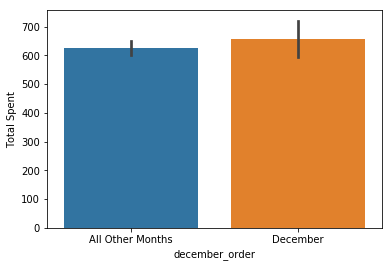

In [210]:
sns.barplot(data=df_order_details, x='december_order',y='Total Spent',ci=68,)

In [211]:
grps = {}
for grp_name in df_order_details['december_order'].unique():
    grps[grp_name] = df_order_details.groupby('december_order').get_group(grp_name)['Total Spent']
    
grps

{'All Other Months': 0        168.00
 1         98.00
 2        174.00
 3        167.40
 4       1696.00
 5         77.00
 6       1484.00
 7        252.00
 8        100.80
 9        234.00
 10       336.00
 11      2592.00
 12        50.00
 13      1088.00
 14       200.00
 15       604.80
 16       640.00
 17        54.00
 18       403.20
 19       168.00
 20       304.00
 21       486.50
 22       380.00
 23      1320.00
 24       393.00
 25       124.80
 26       877.50
 27        86.40
 28       156.00
 29       760.00
          ...   
 2125     360.00
 2126      36.00
 2127     500.00
 2128     465.00
 2129      92.00
 2130     456.00
 2131      40.00
 2132      22.00
 2133      25.00
 2134      30.00
 2135      80.00
 2136      31.00
 2137      76.00
 2138      24.00
 2139      23.25
 2140      34.90
 2141      81.00
 2142      18.00
 2143      32.00
 2144      36.00
 2145      28.95
 2146      36.00
 2147      14.00
 2148      48.00
 2149      68.00
 2150      66.50
 2151      

/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


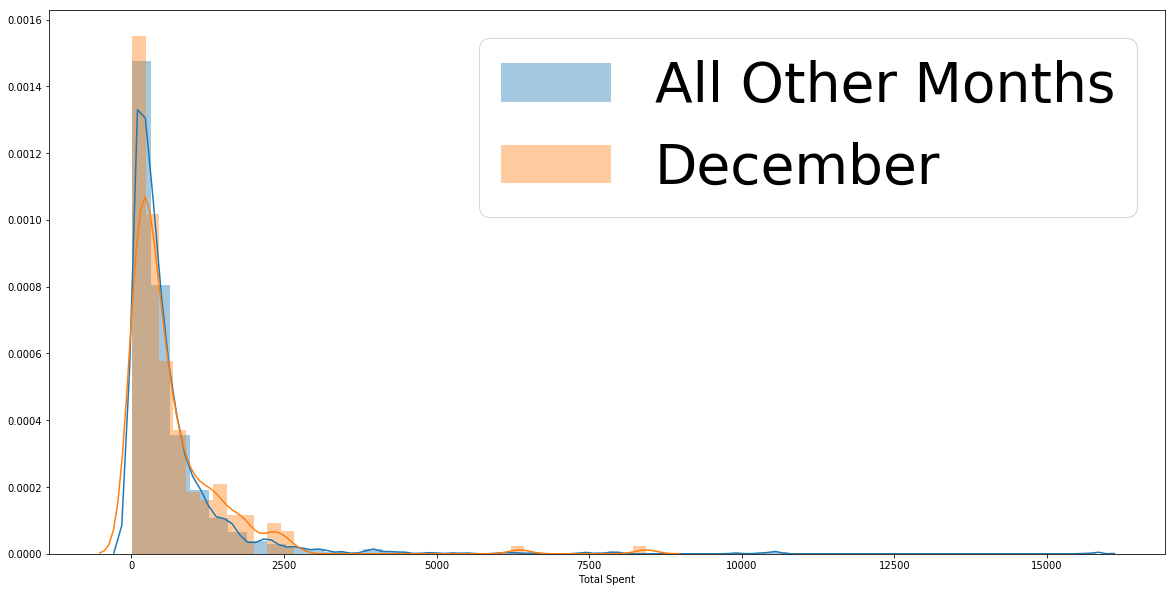

In [212]:
plt.figure(figsize=(20, 10))
[sns.distplot(v,label=k) for k,v in grps.items()]
plt.legend()
plt.legend(fontsize=55);

********************************

## STEP 2: Validate Assumptions chosen test

For the Independent 2 Sample T-Test the assumptions are:

- There exists NO significant outliers
- Normality is true
- Equal Variance is true

### Check and Remove Outliers

Use absolutely value of Z-scores >3 as rule to find and remove outliers

In [213]:
def find_outliers_Z(data):
    """Use scipy to calculate absolute Z-scores 
    and return boolean series where True indicates it is an outlier.

    Args:
        data (Series,or ndarray): data to test for outliers.

    Returns:
        [boolean Series]: A True/False for each row use to slice outliers.
        
    EXAMPLE USE: 
    >> idx_outs = find_outliers_df(df['AdjustedCompensation'])
    >> good_data = df[~idx_outs].copy()
    """
    import scipy.stats as stats
    import numpy as np
    ## Calculate z-scores
    zs = stats.zscore(data)
    
    ## Find z-scores >3 awayfrom mean
    idx_outs = np.abs(zs)>3
    
    ## If input was a series, make idx_outs index match
    if isinstance(data,pd.Series):
        return pd.Series(idx_outs,index=data.index)
    else:
        return pd.Series(idx_outs)

In [214]:
for grp_name,grp_data in grps.items():
    idx_outs = find_outliers_Z(grp_data)
    print(f"[i] Found {idx_outs.sum()} outliers using Z-score method for {grp_name}.")
    grps[grp_name] = grp_data[~idx_outs]

[i] Found 33 outliers using Z-score method for All Other Months.
[i] Found 2 outliers using Z-score method for December.


/Users/SusannaVSyassen/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


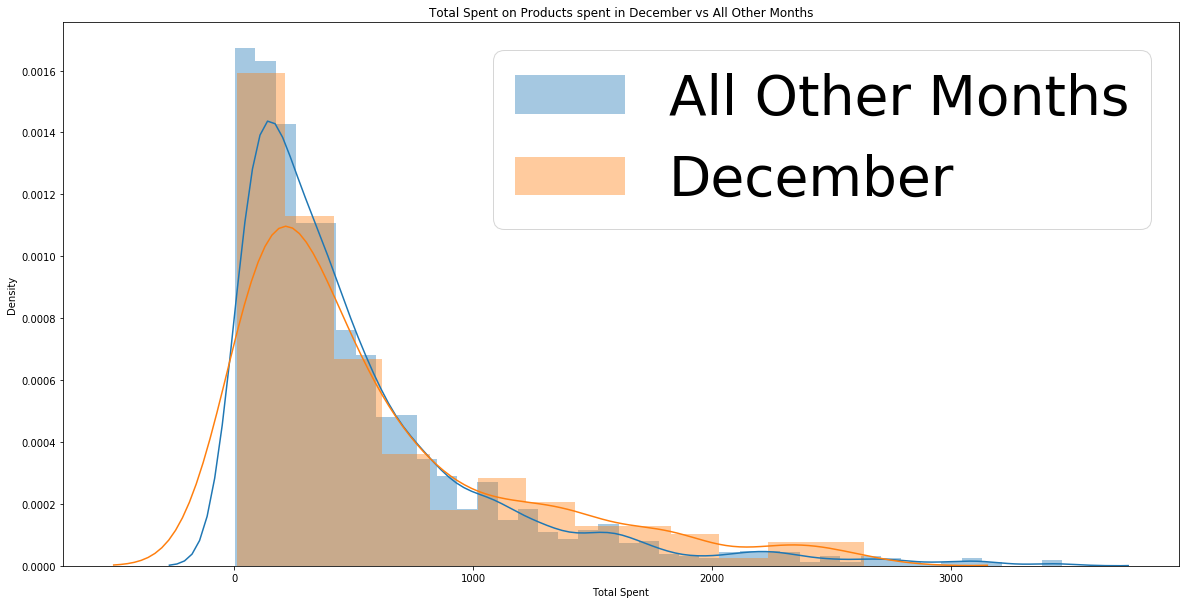

In [218]:
plt.figure(figsize=(20, 10))
[sns.distplot(v,label=k) for k,v in grps.items()]
ax = plt.gca()
ax.legend()
ax.set(title='Total Spent on Products in December vs All Other Months',
ylabel='Density')
plt.legend(fontsize=55);

### Test for Normality

Test Assumption of Normality using D'Agostino-Pearson's normality test scipy.stats.normaltest


In [219]:
for k,v in grps.items():
    stat,p = stats.normaltest(v)
    print(f"Group {k} Normaltest p-value={round(p,4)}")
    sig = 'is NOT' if p<.05 else 'IS'

    print(f"\t-The data {sig} normal.")

Group All Other Months Normaltest p-value=0.0
	-The data is NOT normal.
Group December Normaltest p-value=0.0
	-The data is NOT normal.


If there is normal data move onto assumption testing assumption of equal variance.
The data is NOT normal, Check if your group sizes (n) are big enough to safely ignore normality assumption? (see size definitions below)

Parametric Test	Sample size guidelines for nonnormal data
- 1-sample t test	Greater than 20
- 2-sample t test	Each group should be greater than 15   
- One-Way ANOVA	If have 2-9 groups, each group n >= 15
  If have 10-12 groups, each group n>20.

If the group N's are NOT large enough:
Move onto selecting the non-parametric version of the t-test

As we are doing a 2-Sample T Test, test to see if the group n>= 15.

#### Check group size

In [215]:
for grp_name,grp_data in grps.items():
    print(f"Total size n for {grp_name} is {len(grps[grp_name])}")

Total size n for All Other Months is 1927
Total size n for December is 193


Group size is large enough (>15) to safely ignore normality assumption to continue 2 Sample T-Test

### Test for Equal Variance

Data is large enough, move onto testing for equal variance.
- If it fails the assumption of equal variance: Use a Welch's T-Test. 
    (For scipy, add equal_var=False to ttest_ind)
- If it passes the assumption of equal variance: Use a regular 2-sample t-test.

In [216]:
data=[]
for k,v in grps.items():

    data.append(v.values)

In [220]:
stat,p = stats.levene(*data)
print(f"Levene' Test for Equal Variance p-value={round(p,4)}")
sig = 'do NOT' if p<.05 else 'DO'

print(f"\t-The groups {sig} have equal variance.")

Levene' Test for Equal Variance p-value=0.0878
	-The groups DO have equal variance.


Equal Variance test PASSED, run 2 Sample T-Test

********************************

In [48]:
# create control and experimental groups
# put items without the variable we are curious about into control group
control = df_order_details[df_order_details['Discount'] == 0]
ctrl = control['Total Spent']

# put items with the variable we are curious about into experimental group
experimental = df_order_details[df_order_details['Discount'] != 0]
exp = experimental["Total Spent"]

********************************

## STEP 4: Interpret Result & Post-Hoc Tests

If the P-Value is < $\alpha$:  
- Reject the null hypothesis
- Calculate the effect size (e.g. Cohen's $d$)

If the P-Value <$\alpha$ AND you have multiple groups: 
- Run ANOVA Test
- Run a pairwise Tukey's test to know which groups were significantly different
- Report statistical power (optional)

Post-Hoc Tests/Calculations:
- Tukey's Pairwise Comparisons	statsmodels.stats.multicomp.pairwise_tukeyhsd
-  Effect Size:	Cohens_d
- Statistical Power	statsmodels.stats.power: TTestIndPower , TTestPower

### 2 Sample T-Test

As the results showed NO equal variance or normality add parameter equal_var=false to the 2 Sample T-Test, this should match Welch's T-Test results.

($\alpha$) is set to 0.05 or 5%: This the $\alpha$ value we are comfortable with for making a Type I error.

In order to reduce the probability of type errors, it is best to have a large sample.

- Type I error: reject alternative hypothesis  but the discount has no effect on quantity purchased.

- Type II error: accept null hypothesis but the discount has effect on quantity purchased.


In [222]:
# #ttest_ind(exp_mean_quantity.values, ctrl_mean_quantity.values ) --- catch output and round down
stat,p = ttest_ind(grps['December'],grps['All Other Months'])
# ttest_ind(grps['Full Price'],grps['Discounted'], equal_var=False)
# #catch output and round down
print(f"2 Sample T-Test U p-value={round(p,5)}")
print(f"\t-Stat value {stat}")

2 Sample T-Test U p-value=0.10678
	-Stat value 1.613525995183278


P-Value is < 0.5, Reject the null hypothesis

- $H_1$: The order date month of December DOES have a statistically significant effect on the total spent for the month.
- $H_0$: The order date month of December DOES NOT have a statistically significant effect on the total spent for the month.

We now need to continue to discover why the results show that the month of December DOES have a significant on price (h1)

### Effect Size

How big is the difference between the two groups where the month of December DOES have a statistically significant effect on the total spent of an order?

Calculate the effect size using Cohen's $d$

#### Cohen's d

In [223]:
d=Cohen_d(grps['December'],grps['All Other Months'])
#catch output and round down
print(f"Cohens D result = {round(d,5)}")

Cohens D result = 0.12182


The details below define how to read the results for Cohen's D:
- Small effect = 0.2 (cannot be seen by naked eye) 
- Medium effect = 0.5 
- Large Effect = 0.8 (can be seen by naked eye)

This Cohen's d value = 0.12182, therefore the month of December has a Small Effect on the total spent on an order.

### Anova Test

As the P-Value < .05 AND we have multiple groups run ANOVA to see further the difference between the groups

In [224]:
df_order_details['Total Spent'].groupby(df_order_details['december_order']).describe()

,count,mean,std,min,25%,50%,75%,max
december_order,,,,,,,,
All Other Months,1960.0,625.524964,1048.203644,4.8,153.6,360.0,720.0,15810.0
December,195.0,658.613641,911.994114,12.5,161.6,372.6,811.5,8432.0


In [235]:
# # wrap with C() to indicate categorical variable
# results = ols('Total Spent ~ C(Discount)', data=df_order_details).fit()
# aov_table = sm.stats.anova_lm(results, typ=2)
# print(aov_table)

In [225]:
#f_oneway(ctrl_mean_quantity, exp_mean_quantity)
stat,p = f_oneway(grps['December'],grps['All Other Months'])
print(f"Anova Results stat = {stat} p = {round(d,5)}")

Anova Results stat = 2.6034661371321857 p = 0.12182


There is a significant difference between the groups of discounts, but
Anova does not specify which ones.  Run Tukey's comparison to further discover the difference
between each month value.

### Tukey's Pairwise Comparison

In [226]:
df_grp = pd.DataFrame(grps['December'])
df_grp['group']='All Other Months'
df_grp

,Total Spent,group
324,1980.00,All Other Months
325,547.20,All Other Months
326,216.00,All Other Months
327,798.00,All Other Months
328,160.00,All Other Months
329,91.20,All Other Months
330,777.60,All Other Months
332,1904.00,All Other Months
333,1167.60,All Other Months
334,848.00,All Other Months


In [227]:
def prepare_for_tukeys(grps):
    df_tukey= pd.DataFrame()
    for k,v in grps.items():
        df_grp = pd.DataFrame(v)
        df_grp['Group']=k
        df_tukey = pd.concat([df_tukey,df_grp],axis=0)

    return df_tukey

In [228]:
df_tukey = prepare_for_tukeys(grps)
df_tukey

,Total Spent,Group
0,168.00,All Other Months
1,98.00,All Other Months
2,174.00,All Other Months
3,167.40,All Other Months
4,1696.00,All Other Months
5,77.00,All Other Months
6,1484.00,All Other Months
7,252.00,All Other Months
8,100.80,All Other Months
9,234.00,All Other Months


In [232]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#tukeys = pairwise_tukeyhsd(df_order_details['Total Spent'],df_order_details['order_month'])
tukeys = pairwise_tukeyhsd(df_order_details['Total Spent'],df_order_details['order_month'])
tukeys.summary()

group1,group2,meandiff,lower,upper,reject
April,August,-228.6382,-573.8031,116.5268,False
April,December,-70.6199,-391.4959,250.2562,False
April,February,-4.0139,-322.1369,314.1092,False
April,January,-22.282,-326.4494,281.8855,False
April,July,-99.4024,-457.9097,259.1049,False
April,June,-214.9177,-656.7733,226.9379,False
April,March,-141.7616,-440.2496,156.7265,False
April,May,-234.2506,-578.0087,109.5076,False
April,November,-112.3473,-456.1055,231.4108,False
April,October,-106.1492,-435.1311,222.8328,False


  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1    group2   meandiff   lower    upper   reject
------------------------------------------------------
 April     August  -228.6382 -573.8031 116.5268 False 
 April    December  -70.6199 -391.4959 250.2562 False 
 April    February  -4.0139  -322.1369 314.1092 False 
 April    January   -22.282  -326.4494 281.8855 False 
 April      July    -99.4024 -457.9097 259.1049 False 
 April      June   -214.9177 -656.7733 226.9379 False 
 April     March   -141.7616 -440.2496 156.7265 False 
 April      May    -234.2506 -578.0087 109.5076 False 
 April    November -112.3473 -456.1055 231.4108 False 
 April    October  -106.1492 -435.1311 222.8328 False 
 April   September -154.4373 -500.3173 191.4426 False 
 August   December  158.0183  -208.098 524.1346 False 
 August   February  224.6243 -139.0816 588.3302 False 
 August   January   206.3562 -145.2082 557.9206 False 
 August     July    129.2357 -270.2729 528.7444 False 
 August   

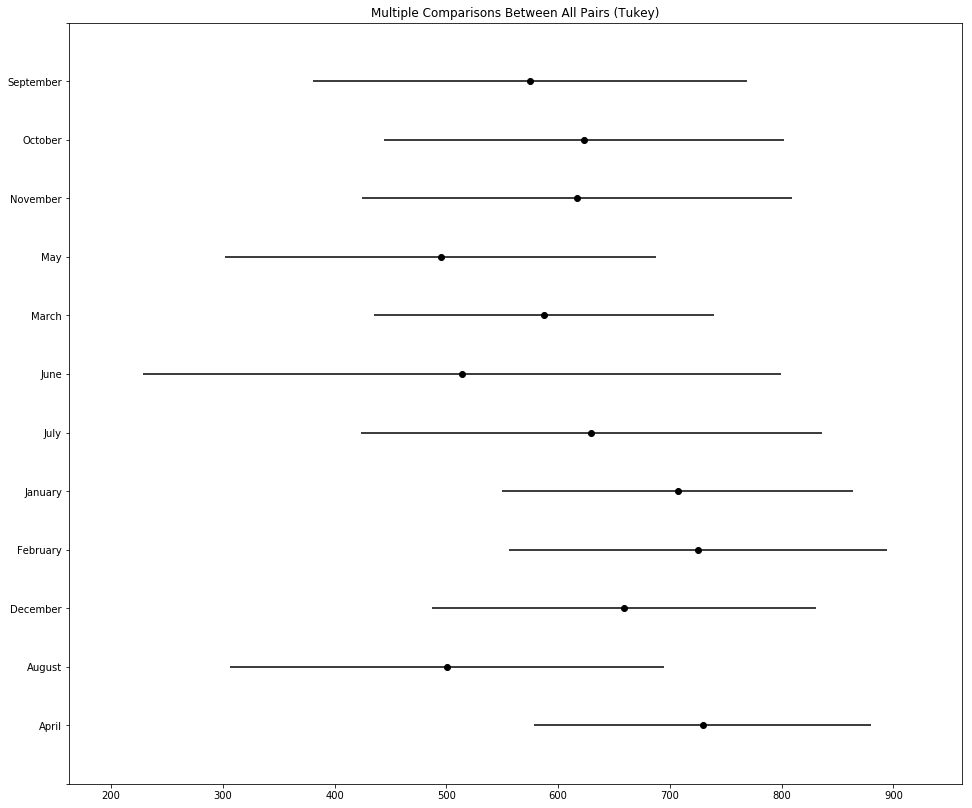

In [233]:
mc = MultiComparison(df_order_details['Total Spent'], df_order_details['order_month'])
mc_tukey_results = mc.tukeyhsd()
print(mc_tukey_results)

mc_tukey_results = mc_tukey_results.plot_simultaneous(figsize=(16,14))
plt.show()

In [234]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#tukeys = pairwise_tukeyhsd(df_order_details['Total Spent'],df_order_details['order_month'])
tukeys = pairwise_tukeyhsd(df_order_details['Total Spent'],df_order_details['december_order'])
tukeys.summary()

group1,group2,meandiff,lower,upper,reject
All Other Months,December,33.0887,-119.5655,185.7429,False


********************************

## Final Analysis

The Null Hypothesis is rejected as the P-Value was < 0.5  December had a slight significant effect according to the Cohen's D result.

As seen from the Tukey's T-Test no month had a statistically significant 
effect on the Total Spent of products ordered.
